In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
import seaborn as sb
import os

In [4]:
# cargar el dataset
df_train = pd.read_csv('credit-g1.csv')
df_train.head(20)

checking_status  duration                  credit_history  \
0      no checking        24                   existing paid   
1      no checking        48  critical/other existing credit   
2      no checking        12                   existing paid   
3      no checking        12  critical/other existing credit   
4      no checking        24                   existing paid   
5               <0        12  critical/other existing credit   
6      no checking        15                   existing paid   
7         0<=X<200        11                   existing paid   
8               <0        12                   existing paid   
9      no checking        27              delayed previously   
10              <0        30  critical/other existing credit   
11     no checking        12                   existing paid   
12              <0        48             no credits/all paid   
13     no checking        12  critical/other existing credit   
14              <0        12                   existing paid   
15        0<=X<200        48                   existing paid   
16     no checking        18  critical/other existing credit   
17        0<=X<200         9                   existing paid   
18              <0        12                   existing paid   
19        0<=X<200        18  critical/other existing credit   
20     no checking        18  critical/other existing credit   
21     no checking        24  critical/other existing credit   
22              <0        36                   existing paid   
23              <0        36                   existing paid   
24              <0         6                   existing paid   
25     no checking        24                   existing paid   
26              <0         6  critical/other existing credit   
27     no checking         4  critical/other existing credit   
28        0<=X<200        12                   existing paid   
29              <0         9  critical/other existing credit   
30     no checking         9                   existing paid   
31     no checking        15                   existing paid   
32              <0        48                   existing paid   
33           >=200        10  critical/other existing credit   
34        0<=X<200        24                   existing paid   
35           >=200        24  critical/other existing credit   
36        0<=X<200        20             no credits/all paid   
37        0<=X<200        48                        all paid   
38              <0        12                   existing paid   
39     no checking         6  critical/other existing credit   
40     no checking        24              delayed previously   
41     no checking        12                   existing paid   
42     no checking         4                   existing paid   
43     no checking        12  critical/other existing credit   
44     no checking        36  critical/other existing credit   
45              <0        27  critical/other existing credit   
46        0<=X<200        48             no credits/all paid   
47        0<=X<200        60                   existing paid   
48           >=200        30  critical/other existing credit   
49        0<=X<200         6                   existing paid   
50     no checking         4                   existing paid   
51     no checking         4                   existing paid   

                purpose  credit_amount    savings_status  employment  \
0              radio/tv           3430       500<=X<1000         >=7   
1             education           6110              <100      1<=X<4   
2              radio/tv           1262              <100      1<=X<4   
3              radio/tv            618              <100         >=7   
4               new car           1469        100<=X<500         >=7   
5               new car           3499              <100      1<=X<4   
6   furniture/equipment           2708              <100          <1   
7   furniture/equipment           

checking_status  duration                  credit_history  \
0      no checking        24                   existing paid   
1      no checking        48  critical/other existing credit   
2      no checking        12                   existing paid   
3      no checking        12  critical/other existing credit   
4      no checking        24                   existing paid   
5               <0        12  critical/other existing credit   
6      no checking        15                   existing paid   
7         0<=X<200        11                   existing paid   
8               <0        12                   existing paid   
9      no checking        27              delayed previously   
10              <0        30  critical/other existing credit   
11     no checking        12                   existing paid   
12              <0        48             no credits/all paid   
13     no checking        12  critical/other existing credit   
14              <0        12                   existing paid   
15        0<=X<200        48                   existing paid   
16     no checking        18  critical/other existing credit   
17        0<=X<200         9                   existing paid   
18              <0        12                   existing paid   
19        0<=X<200        18  critical/other existing credit   

                purpose  credit_amount    savings_status  employment  \
0              radio/tv           3430       500<=X<1000         >=7   
1             education           6110              <100      1<=X<4   
2              radio/tv           1262              <100      1<=X<4   
3              radio/tv            618              <100         >=7   
4               new car           1469        100<=X<500         >=7   
5               new car           3499              <100      1<=X<4   
6   furniture/equipment           2708              <100          <1   
7   furniture/equipment           1577            >=1000          <1   
8               new car           1168              <100      1<=X<4   
9              business           5117              <100      4<=X<7   
10             used car          10623              <100         >=7   
11             used car           1413            >=1000      4<=X<7   
12             used car           4605              <100         >=7   
13  furniture/equipment           1402       500<=X<1000      4<=X<7   
14  furniture/equipment           1262  no known savings         >=7   
15                other           5381  no known savings  unemployed   
16              new car           1028              <100      1<=X<4   
17  furniture/equipment            959              <100      1<=X<4   
18  furniture/equipment           2578              <100  unemployed   
19             business           1887  no known savings      1<=X<4   

    installment_commitment     personal_status other_parties  ...  age  \
0                        3         male single          none  ...   31   
1                        1         male single          none  ...   31   
2                        3         male single          none  ...   25   
3                        4         male single          none  ...   56   
4                        4        male mar/wid          none  ...   41   
5                        3  female div/dep/mar  co applicant  ...   29   
6                        2         male single          none  ...   27   
7                        4  female div/dep/mar          none  ...   20   
8                        4        male mar/wid          none  ...   27   
9                        3         male single          none  ...   26   
10                       3         male single          none  ...   38   
11                       3         male single          none  ...   55   
12                       3         male single          none  ...   24   
13                       3  female div/dep/mar          none  ...   37   
14                       2        m

In [3]:
# Eliminar las filas duplicadas
df_train.drop_duplicates(subset=None, inplace=True)
df_train

checking_status  duration                  credit_history  \
0      no checking        24                   existing paid   
1      no checking        48  critical/other existing credit   
2      no checking        12                   existing paid   
3      no checking        12  critical/other existing credit   
4      no checking        24                   existing paid   
5               <0        12  critical/other existing credit   
6      no checking        15                   existing paid   
7         0<=X<200        11                   existing paid   
8               <0        12                   existing paid   
9      no checking        27              delayed previously   
10              <0        30  critical/other existing credit   
11     no checking        12                   existing paid   
12              <0        48             no credits/all paid   
13     no checking        12  critical/other existing credit   
14              <0        12                   existing paid   
15        0<=X<200        48                   existing paid   
16     no checking        18  critical/other existing credit   
17        0<=X<200         9                   existing paid   
18              <0        12                   existing paid   
19        0<=X<200        18  critical/other existing credit   
20     no checking        18  critical/other existing credit   
21     no checking        24  critical/other existing credit   
22              <0        36                   existing paid   
23              <0        36                   existing paid   
24              <0         6                   existing paid   
25     no checking        24                   existing paid   
26              <0         6  critical/other existing credit   
27     no checking         4  critical/other existing credit   
28        0<=X<200        12                   existing paid   
29              <0         9  critical/other existing credit   
30     no checking         9                   existing paid   
31     no checking        15                   existing paid   
32              <0        48                   existing paid   
33           >=200        10  critical/other existing credit   
34        0<=X<200        24                   existing paid   
35           >=200        24  critical/other existing credit   
36        0<=X<200        20             no credits/all paid   
37        0<=X<200        48                        all paid   
38              <0        12                   existing paid   
39     no checking         6  critical/other existing credit   
40     no checking        24              delayed previously   
41     no checking        12                   existing paid   
42     no checking         4                   existing paid   
43     no checking        12  critical/other existing credit   
44     no checking        36  critical/other existing credit   
45              <0        27  critical/other existing credit   
46        0<=X<200        48             no credits/all paid   
47        0<=X<200        60                   existing paid   
48           >=200        30  critical/other existing credit   
49        0<=X<200         6                   existing paid   

                purpose  credit_amount    savings_status  employment  \
0              radio/tv           3430       500<=X<1000         >=7   
1             education           6110              <100      1<=X<4   
2              radio/tv           1262              <100      1<=X<4   
3              radio/tv            618              <100         >=7   
4               new car           1469        100<=X<500         >=7   
5               new car           3499              <100      1<=X<4   
6   furniture/equipment           2708              <100          <1   
7   furniture/equipment           1577            >=1000          <1   
8               new car           1168              <100      1<=X<4   
9              bus

In [4]:
# Eliminar las columnas duplicadas
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [5]:
duplicateColumnNames = getDuplicateColumns(df_train)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows


In [6]:
# Si existen duplicadas borrar
newDf = df_train.drop(columns=getDuplicateColumns(df_train))
newDf

checking_status  duration                  credit_history  \
0      no checking        24                   existing paid   
1      no checking        48  critical/other existing credit   
2      no checking        12                   existing paid   
3      no checking        12  critical/other existing credit   
4      no checking        24                   existing paid   
5               <0        12  critical/other existing credit   
6      no checking        15                   existing paid   
7         0<=X<200        11                   existing paid   
8               <0        12                   existing paid   
9      no checking        27              delayed previously   
10              <0        30  critical/other existing credit   
11     no checking        12                   existing paid   
12              <0        48             no credits/all paid   
13     no checking        12  critical/other existing credit   
14              <0        12                   existing paid   
15        0<=X<200        48                   existing paid   
16     no checking        18  critical/other existing credit   
17        0<=X<200         9                   existing paid   
18              <0        12                   existing paid   
19        0<=X<200        18  critical/other existing credit   
20     no checking        18  critical/other existing credit   
21     no checking        24  critical/other existing credit   
22              <0        36                   existing paid   
23              <0        36                   existing paid   
24              <0         6                   existing paid   
25     no checking        24                   existing paid   
26              <0         6  critical/other existing credit   
27     no checking         4  critical/other existing credit   
28        0<=X<200        12                   existing paid   
29              <0         9  critical/other existing credit   
30     no checking         9                   existing paid   
31     no checking        15                   existing paid   
32              <0        48                   existing paid   
33           >=200        10  critical/other existing credit   
34        0<=X<200        24                   existing paid   
35           >=200        24  critical/other existing credit   
36        0<=X<200        20             no credits/all paid   
37        0<=X<200        48                        all paid   
38              <0        12                   existing paid   
39     no checking         6  critical/other existing credit   
40     no checking        24              delayed previously   
41     no checking        12                   existing paid   
42     no checking         4                   existing paid   
43     no checking        12  critical/other existing credit   
44     no checking        36  critical/other existing credit   
45              <0        27  critical/other existing credit   
46        0<=X<200        48             no credits/all paid   
47        0<=X<200        60                   existing paid   
48           >=200        30  critical/other existing credit   
49        0<=X<200         6                   existing paid   

                purpose  credit_amount    savings_status  employment  \
0              radio/tv           3430       500<=X<1000         >=7   
1             education           6110              <100      1<=X<4   
2              radio/tv           1262              <100      1<=X<4   
3              radio/tv            618              <100         >=7   
4               new car           1469        100<=X<500         >=7   
5               new car           3499              <100      1<=X<4   
6   furniture/equipment           2708              <100          <1   
7   furniture/equipment           1577            >=1000          <1   
8               new car           1168              <100      1<=X<4   
9              bus

In [7]:
# 3. Identificar columnas que tienen valores constantes
def get_constant_columns(dataframe):
    constantColumns = set()
    for column in dataframe.columns:
        if len(dataframe[column].unique()) == 1: # un solo valor unico
            # print(dataframe[column])
            constantColumns.add(column)
    return constantColumns

In [8]:
get_constant_columns(newDf)

{'yak'}

In [9]:
# 4. Identifique el porcentaje de valores faltantes en las columnas
total = newDf.isnull().sum().sort_values(ascending=False)
percent = (newDf.isnull().sum()/newDf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
yak                         0      0.0
class                       0      0.0
duration                    0      0.0
credit_history              0      0.0
purpose                     0      0.0
credit_amount               0      0.0
savings_status              0      0.0
employment                  0      0.0
installment_commitment      0      0.0
personal_status             0      0.0
other_parties               0      0.0
residence_since             0      0.0
property_magnitude          0      0.0
age                         0      0.0
other_payment_plans         0      0.0
housing                     0      0.0
existing_credits            0      0.0
job                         0      0.0
num_dependents              0      0.0
own_telephone               0      0.0
foreign_worker              0      0.0
checking_status             0      0.0

5. Para el dataset hacer un análisis gráfico documentado de las variables:
  - Histograms
  - Quartiles
  - Scatter plots
  - Distributions
  - Boxplots
  - Bar plot
  - Heartmaps

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e55e71790>,
      dtype=object)

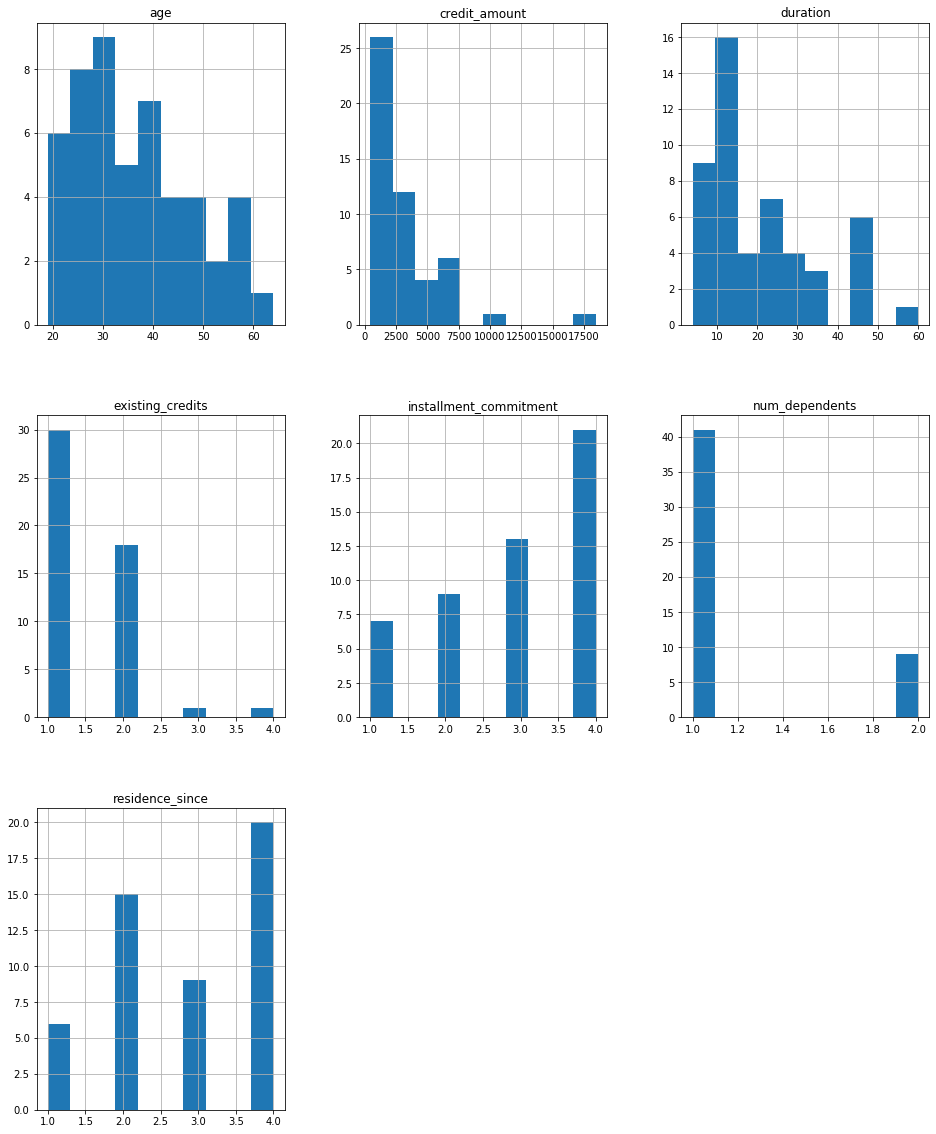

In [10]:
# Histogramas
newDf.columns.values
newDf.hist(figsize=(16, 20)) #, xlabelsize=8, ylabelsize=8)


----------------- Scatter plot con seaborn -----------


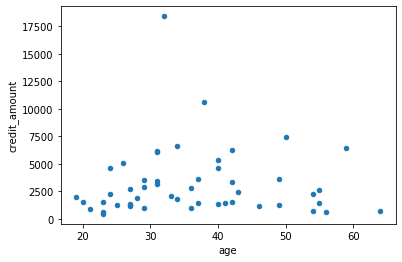

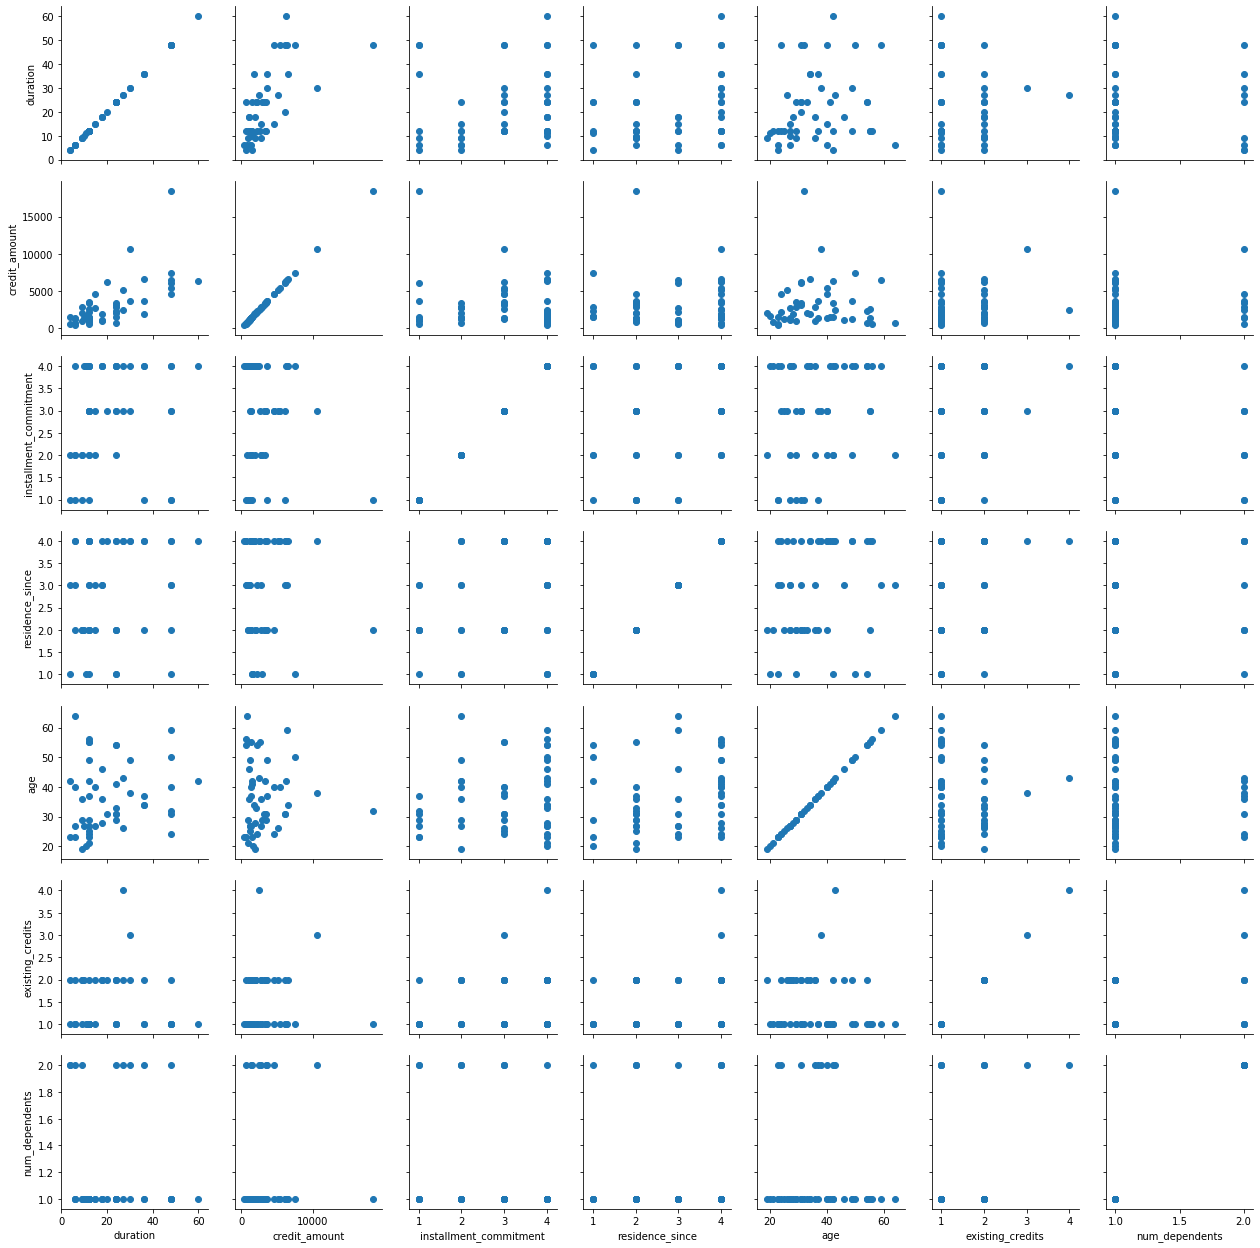

In [11]:
# Quartiles (pendiente)
# Scatter plot con matplotlib
newDf.plot(kind='scatter', x='age', y='credit_amount')
# newDf.plot(kind='scatter', x='age', y='duration')
print("----------------- Scatter plot con seaborn -----------")
x = sb.PairGrid(newDf)
x = x.map(plt.scatter)

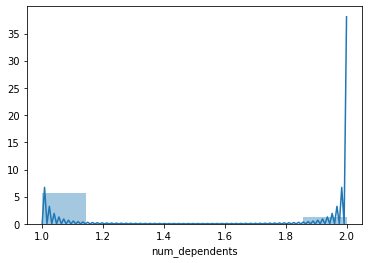

In [12]:
# Distribution
sb.distplot(newDf['num_dependents'])

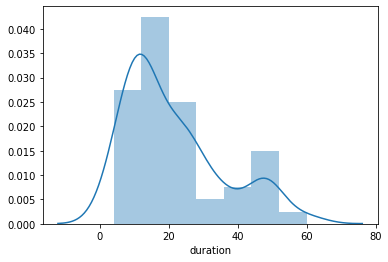

In [13]:
sb.distplot(newDf['duration'])


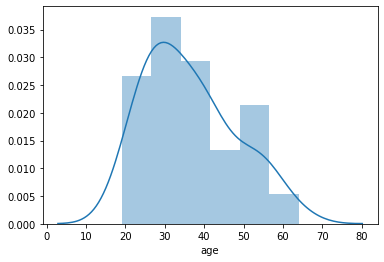

In [14]:
sb.distplot(newDf['age'])

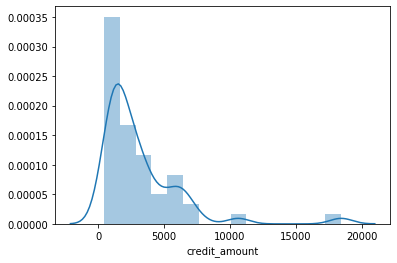

In [15]:
sb.distplot(newDf['credit_amount'])


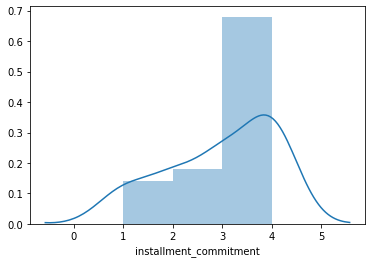

In [16]:
sb.distplot(newDf['installment_commitment'])

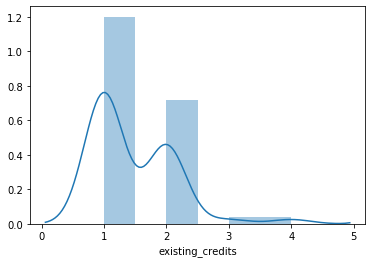

In [17]:
sb.distplot(newDf['existing_credits'])

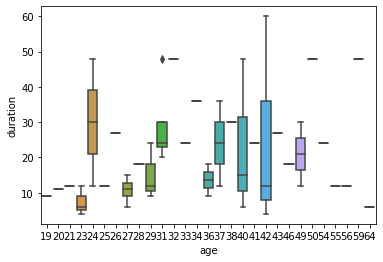

In [18]:
#Box plots
sb.boxplot(x='age', y='duration', data=newDf)

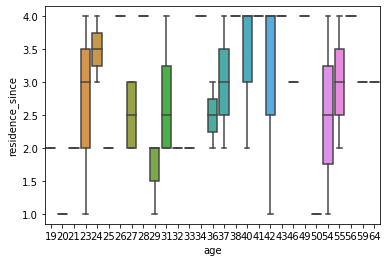

In [19]:
sb.boxplot(x='age', y='residence_since', data=newDf)

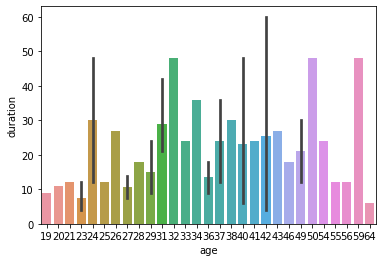

In [20]:
#Bar plot
sb.barplot(x='age', y='duration', data=newDf)

Lo siguiente (no es recomendada), grafica el barplot de las columnas numéricas usando `astype(str).str.isnumeric()` para convertir a numérico si se puede y `all()` para verificar que todos los valores devueltos sean `True`.

En lugar de eso para seleccionar solo columnas numéricas se puede usar `select_dtypes`.

duration


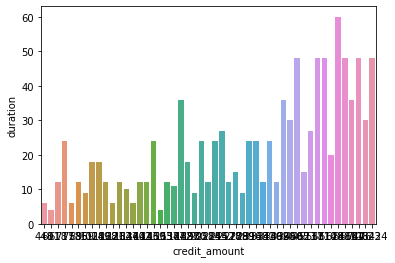

credit_amount


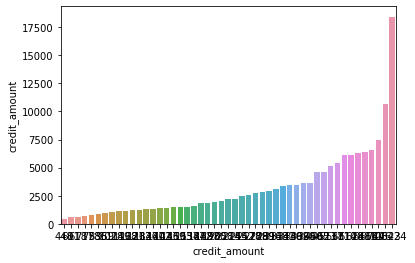

installment_commitment


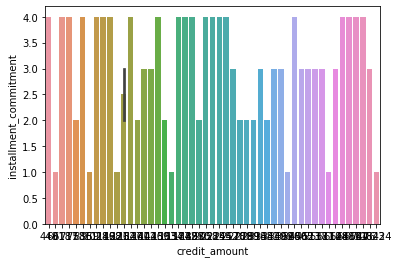

residence_since


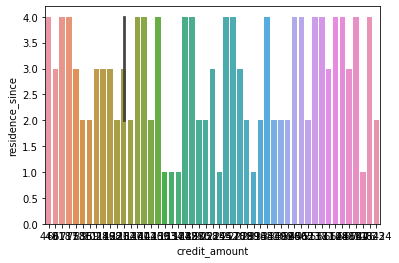

age


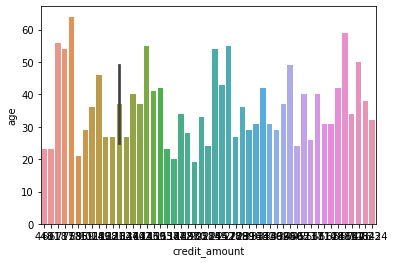

existing_credits


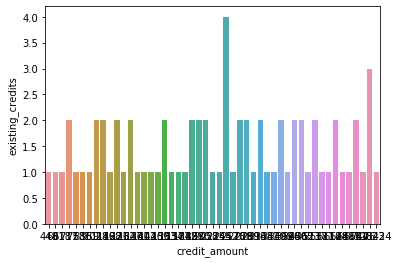

num_dependents


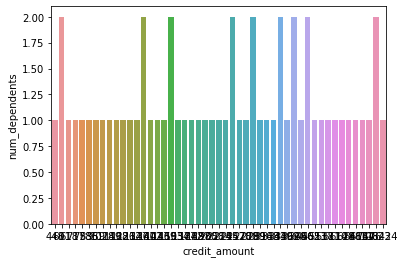

In [21]:
colsNumericas = []
columnas = list(newDf.columns)
#for col in columnas:
    # es una operación pesada por intentar convertir a cadena cada valor
#    if newDf[col].astype(str).str.isnumeric().all():
#        colsNumericas.append(col)
colsNumericas = newDf.select_dtypes(include=[np.number])
colsNumericas
# graficando todos lox boxplot la columna credit_amount con todas las demas (prueba)
col1 = colsNumericas['credit_amount']
for col in colsNumericas:
    print(col)
    sb.barplot(x=col1, y=col, data=newDf)
    plt.show()
    

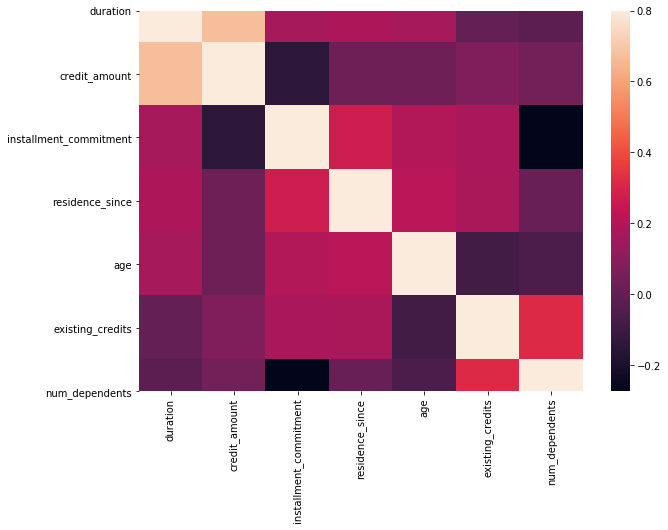

In [22]:
#correlation matrix
corrmat = newDf.corr()
f, ax = plt.subplots(figsize=(10, 7))
sb.heatmap(corrmat, vmax=.8, square=True);

In [23]:
# 6. Aplicar expresión matemática para el cálculo (CreditAmount / Duración)*residence_since
Series(newDf['credit_amount']/newDf['duration'])*newDf['residence_since']

0      285.833333
1      381.875000
2      210.333333
3      206.000000
4      244.833333
5      583.166667
6      541.600000
7      143.363636
8      292.000000
9      758.074074
10    1416.400000
11     235.500000
12     383.750000
13     467.333333
14     420.666667
15     448.416667
16     171.333333
17     213.111111
18     859.333333
19     419.333333
20     191.500000
21     171.500000
22     204.666667
23     201.111111
24     298.666667
25      93.958333
26     907.333333
27     375.750000
28     127.833333
29     622.000000
30     440.000000
31     616.400000
32     155.750000
33     269.400000
34     120.666667
35     262.333333
36    1229.600000
37     401.000000
38     553.500000
39     407.000000
40     119.500000
41     147.666667
42     450.750000
43    1110.333333
44     734.888889
45     361.777778
46     767.666667
47     419.200000
48     487.466667
49     376.500000
dtype: float64

In [24]:
# 9. Obtenga la matriz de correlación de las variables numéricas.
numeric_columns = newDf.select_dtypes(include=[np.number])
numeric_columns.describe()

duration  credit_amount  installment_commitment  residence_since  \
count  50.000000      50.000000               50.000000        50.000000   
mean   21.320000    3156.920000                2.960000         2.860000   
std    14.331982    3093.602812                1.087217         1.088155   
min     4.000000     448.000000                1.000000         1.000000   
25%    12.000000    1283.250000                2.000000         2.000000   
50%    16.500000    2136.000000                3.000000         3.000000   
75%    27.000000    3647.000000                4.000000         4.000000   
max    60.000000   18424.000000                4.000000         4.000000   

             age  existing_credits  num_dependents  
count  50.000000          50.00000       50.000000  
mean   36.260000           1.46000        1.180000  
std    11.431803           0.64555        0.388088  
min    19.000000           1.00000        1.000000  
25%    27.000000           1.00000        1.000000  
50%    34.000000           1.00000        1.000000  
75%    42.000000           2.00000        1.000000  
max    64.000000           4.00000        2.000000

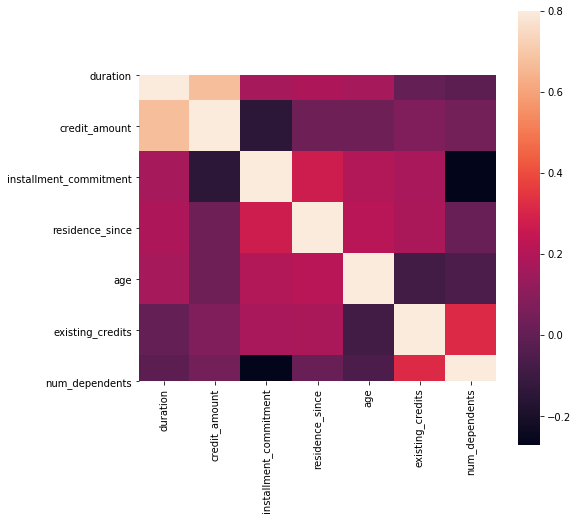

In [25]:
#correlation matrix
corrmat = numeric_columns.corr()
f, ax = plt.subplots(figsize=(8, 8))
sb.heatmap(corrmat, vmax=.8, square=True);

In [26]:
# 10. Obtenga la tabla de relación de frecuencias entre los atributos job y purpose.

In [27]:
# 11. Mapear a valores diferentes para atributos own_telephone, foreign_worker.
import random
import string
def randomString(stringLength=10):
    """Generate a random string of fixed length """
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(stringLength))

def mapRandomValues(_data_frame, columName):
    '''Map to random values the given columName of the dataFrame'''
    dict_mapping = {}
    for valor in _data_frame[columName].unique():
        dict_mapping[valor] = randomString(len(valor))    
    return _data_frame[columName].map(dict_mapping)
mapRandomValues(newDf, 'own_telephone')

0      xbk
1      xbk
2     kyta
3     kyta
4     kyta
5     kyta
6     kyta
7     kyta
8     kyta
9     kyta
10     xbk
11    kyta
12    kyta
13     xbk
14     xbk
15     xbk
16    kyta
17    kyta
18    kyta
19    kyta
20    kyta
21     xbk
22     xbk
23    kyta
24    kyta
25    kyta
26    kyta
27    kyta
28    kyta
29    kyta
30    kyta
31     xbk
32     xbk
33     xbk
34    kyta
35     xbk
36     xbk
37    kyta
38    kyta
39    kyta
40     xbk
41    kyta
42    kyta
43    kyta
44     xbk
45     xbk
46     xbk
47    kyta
48    kyta
49    kyta
Name: own_telephone, dtype: object

In [28]:
mapRandomValues(newDf, 'foreign_worker')

0     pet
1     pet
2     pet
3     pet
4     pet
5     pet
6     pet
7     pet
8     pet
9     pet
10    pet
11     dm
12    pet
13    pet
14    pet
15    pet
16    pet
17     dm
18    pet
19    pet
20    pet
21    pet
22    pet
23    pet
24    pet
25    pet
26     dm
27    pet
28    pet
29    pet
30    pet
31    pet
32    pet
33    pet
34    pet
35    pet
36    pet
37    pet
38    pet
39    pet
40    pet
41    pet
42    pet
43    pet
44    pet
45    pet
46     dm
47    pet
48    pet
49    pet
Name: foreign_worker, dtype: object

In [29]:
# 12. Normalizar el campo instalment_commitment por frecuencia.

In [48]:
# 13. Normalizar el campo instalment_commitment en el rango (-1,2)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,2))
#min_max_scaler.transform(np.array([newDf['installment_commitment']]))
min_max_scaler.fit_transform(np.array([newDf['installment_commitment']]))

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [106]:
# 14. Detectar outliers por medio de Inter-quartil range
# Mas del metodo: https://medium.com/@davidnh8/outlier-detection-101-median-and-interquartile-range-cc9dde94c0ac
def get_IQR_outliers(df, var):
    q1 = df[var].quantile(.25)
    q3 = df[var].quantile(.75)
    iqr = q3-q1 # interquertile range
    h = 3*iqr # originally 1.5
    return df.loc[(df[var] > q3+h) & (df[var] < q1-h), var]

def rm_IRQ_outliers(df, var):
    q1 = df[var].quantile(.25)
    q3 = df[var].quantile(.75)
    iqr = q3-q1 # interquertile range
    h = 3*iqr # originally 1.5
    df.loc[df[var] > q3+h, var] = q3+h
    df.loc[df[var] < q1-h, var] = q1-h

get_IQR_outliers(newDf, 'credit_amount')
get_IQR_outliers(newDf, 'duration')
get_IQR_outliers(newDf, 'age')
#rm_IRQ_outliers(newDf, 'credit_amount')

Series([], Name: age, dtype: float64)

In [107]:
var = 'age'
q1 = newDf[var].quantile(.25)
q3 = newDf[var].quantile(.75)
iqr = q3-q1 # interquertile range
h = 3*iqr # originally 1.5
#print(q1, q3, q3+h, q1-h)
#newDf.loc[newDf[var] > 29, var] 
#newDf.loc[newDf[var] < 1000, var] 
newDf.loc[(newDf[var] > q3+h) & (newDf[var] < q1-h), var]

#newDf.loc[newDf[var] > q3+h, var] 
#newDf.loc[newDf[var] < q1-h, var] 

Series([], Name: age, dtype: float64)

In [109]:
# 15. Utilice One-hot encoding en campo purpose.
df = pd.get_dummies(newDf, prefix_sep="_",
                              columns=['purpose'])
df

checking_status  duration                  credit_history  credit_amount  \
0      no checking        24                   existing paid        3430.00   
1      no checking        48  critical/other existing credit        6110.00   
2      no checking        12                   existing paid        1262.00   
3      no checking        12  critical/other existing credit         618.00   
4      no checking        24                   existing paid        1469.00   
5               <0        12  critical/other existing credit        3499.00   
6      no checking        15                   existing paid        2708.00   
7         0<=X<200        11                   existing paid        1577.00   
8               <0        12                   existing paid        1168.00   
9      no checking        27              delayed previously        5117.00   
10              <0        30  critical/other existing credit       10623.00   
11     no checking        12                   existing paid        1413.00   
12              <0        48             no credits/all paid        4605.00   
13     no checking        12  critical/other existing credit        1402.00   
14              <0        12                   existing paid        1262.00   
15        0<=X<200        48                   existing paid        5381.00   
16     no checking        18  critical/other existing credit        1028.00   
17        0<=X<200         9                   existing paid         959.00   
18              <0        12                   existing paid        2578.00   
19        0<=X<200        18  critical/other existing credit        1887.00   
20     no checking        18  critical/other existing credit        1149.00   
21     no checking        24  critical/other existing credit        2058.00   
22              <0        36                   existing paid        1842.00   
23              <0        36                   existing paid        3620.00   
24              <0         6                   existing paid         448.00   
25     no checking        24                   existing paid        2255.00   
26              <0         6  critical/other existing credit        1361.00   
27     no checking         4  critical/other existing credit        1503.00   
28        0<=X<200        12                   existing paid        1534.00   
29              <0         9  critical/other existing credit        2799.00   
30     no checking         9                   existing paid        1980.00   
31     no checking        15                   existing paid        4623.00   
32              <0        48                   existing paid        7476.00   
33           >=200        10  critical/other existing credit        1347.00   
34        0<=X<200        24                   existing paid        2896.00   
35           >=200        24  critical/other existing credit        3148.00   
36        0<=X<200        20             no credits/all paid        6148.00   
37        0<=X<200        48                        all paid        6416.00   
38              <0        12                   existing paid        2214.00   
39     no checking         6  critical/other existing credit        1221.00   
40     no checking        24              delayed previously         717.00   
41     no checking        12                   existing paid         886.00   
42     no checking         4                   existing paid         601.00   
43     no checking        12  critical/other existing credit        3331.00   
44     no checking        36  critical/other existing credit        6614.00   
45              <0        27  critical/other existing credit        2442.00   
46        0<=X<200        48             no credits/all paid       10738.25   
47        0<=X<200        60                   existing paid        6288.00   
48           >=200        30  critical/other existing credit        3656.00   
49        0<=X<200         6                   existi

In [114]:
# 16. Obtenga las instancias que cumplan la condición de un monto de crédito mayor a 3000
newDf.loc[newDf['credit_amount'] > 3000, :]

checking_status  duration                  credit_history  \
0      no checking        24                   existing paid   
1      no checking        48  critical/other existing credit   
5               <0        12  critical/other existing credit   
9      no checking        27              delayed previously   
10              <0        30  critical/other existing credit   
12              <0        48             no credits/all paid   
15        0<=X<200        48                   existing paid   
23              <0        36                   existing paid   
31     no checking        15                   existing paid   
32              <0        48                   existing paid   
35           >=200        24  critical/other existing credit   
36        0<=X<200        20             no credits/all paid   
37        0<=X<200        48                        all paid   
43     no checking        12  critical/other existing credit   
44     no checking        36  critical/other existing credit   
46        0<=X<200        48             no credits/all paid   
47        0<=X<200        60                   existing paid   
48           >=200        30  critical/other existing credit   

                purpose  credit_amount    savings_status  employment  \
0              radio/tv        3430.00       500<=X<1000         >=7   
1             education        6110.00              <100      1<=X<4   
5               new car        3499.00              <100      1<=X<4   
9              business        5117.00              <100      4<=X<7   
10             used car       10623.00              <100         >=7   
12             used car        4605.00              <100         >=7   
15                other        5381.00  no known savings  unemployed   
23  furniture/equipment        3620.00              <100      1<=X<4   
31            education        4623.00        100<=X<500      1<=X<4   
32            education        7476.00              <100      4<=X<7   
35             radio/tv        3148.00  no known savings      1<=X<4   
36             used car        6148.00        100<=X<500         >=7   
37             business        6416.00              <100         >=7   
43  furniture/equipment        3331.00              <100         >=7   
44              new car        6614.00              <100         >=7   
46                other       10738.25              <100      1<=X<4   
47            education        6288.00              <100      1<=X<4   
48             radio/tv        3656.00  no known savings         >=7   

    installment_commitment     personal_status other_parties  ...   age  \
0                        3         male single          none  ...  31.0   
1                        1         male single          none  ...  31.0   
5                        3  female div/dep/mar  co applicant  ...  29.0   
9                        3         male single          none  ...  26.0   
10                       3         male single          none  ...  38.0   
12                       3         male single          none  ...  24.0   
15                       3         male single          none  ...  40.0   
23                       1         male single     guarantor  ...  37.0   
31                       3         male single          none  ...  40.0   
32                       4         male single          none  ...  50.0   
35                       3         male single          none  ...  31.0   
36                       3        male mar/wid          none  ...  31.0   
37                       4  female div/dep/mar          none  ...  59.0   
43                       2         male single          none  ...  42.0   
44                       4         male single          none  ...  34.0   
46                       1  female div/dep/mar          none  ...  32.0   
47                       4         male single          none  ...  42.0   
48                       4         male single          none  ...  

In [115]:
# 17. Obtenga las instancias que cumplen con la condición de que job sea igual a “skilled”
# y que el monto de crédito sea mayor a 2000.
newDf.loc[(newDf['job'] == 'skilled') & (newDf['credit_amount'] > 2000), :]

checking_status  duration                  credit_history  \
0      no checking        24                   existing paid   
1      no checking        48  critical/other existing credit   
5               <0        12  critical/other existing credit   
9      no checking        27              delayed previously   
12              <0        48             no credits/all paid   
21     no checking        24  critical/other existing credit   
23              <0        36                   existing paid   
25     no checking        24                   existing paid   
29              <0         9  critical/other existing credit   
34        0<=X<200        24                   existing paid   
35           >=200        24  critical/other existing credit   
36        0<=X<200        20             no credits/all paid   
37        0<=X<200        48                        all paid   
43     no checking        12  critical/other existing credit   
47        0<=X<200        60                   existing paid   

                purpose  credit_amount    savings_status employment  \
0              radio/tv         3430.0       500<=X<1000        >=7   
1             education         6110.0              <100     1<=X<4   
5               new car         3499.0              <100     1<=X<4   
9              business         5117.0              <100     4<=X<7   
12             used car         4605.0              <100        >=7   
21              repairs         2058.0              <100     1<=X<4   
23  furniture/equipment         3620.0              <100     1<=X<4   
25              new car         2255.0  no known savings         <1   
29              new car         2799.0              <100     1<=X<4   
34             radio/tv         2896.0        100<=X<500         <1   
35             radio/tv         3148.0  no known savings     1<=X<4   
36             used car         6148.0        100<=X<500        >=7   
37             business         6416.0              <100        >=7   
43  furniture/equipment         3331.0              <100        >=7   
47            education         6288.0              <100     1<=X<4   

    installment_commitment     personal_status other_parties  ...   age  \
0                        3         male single          none  ...  31.0   
1                        1         male single          none  ...  31.0   
5                        3  female div/dep/mar  co applicant  ...  29.0   
9                        3         male single          none  ...  26.0   
12                       3         male single          none  ...  24.0   
21                       4        male div/sep          none  ...  33.0   
23                       1         male single     guarantor  ...  37.0   
25                       4         male single          none  ...  54.0   
29                       2         male single          none  ...  36.0   
34                       2         male single          none  ...  29.0   
35                       3         male single          none  ...  31.0   
36                       3        male mar/wid          none  ...  31.0   
37                       4  female div/dep/mar          none  ...  59.0   
43                       2         male single          none  ...  42.0   
47                       4         male single          none  ...  42.0   

   other_payment_plans   housing existing_credits      job  num_dependents  \
0                 none       own                1  skilled               2   
1                 bank  for free                1  skilled               1   
5                 none       own                2  skilled               1   
9                 none       own                2  skilled               1   
12                none  for free                2  skilled               2   
21                none       own                2  skilled               1   
23                none       own                1  skilled               2   
25              

In [117]:
# 18. Obtenga suma total del camp credit_amount agrupado por el campo purpose “new car”.
newDf['credit_amount'].sum()

150160.25